<center><h1>Hong_Seungil_HW4</h1></center>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093 

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from builtins import range
import os
import glob
import re

Get the AReM Data Set

### (b) Splitting Data

In [16]:
def list_files_no_hidden(path):
    """Return a sorted list of all non-hidden files in the directory."""
    # Ensure that only files are listed (excluding directories)
    return sorted([f for f in glob.glob(os.path.join(path, '*')) if os.path.isfile(f) and not os.path.basename(f).startswith('.')])

def load_data(file, column_names):
    """Load data from a CSV file."""
    try:
        # Try reading the data
        raw_data = pd.read_csv(file, skiprows=5, header=None) # skip fist 5 rows of general info
        
        if raw_data.shape[1] != len(column_names):
            print(f"Warning: Mismatch in number of columns for file {file}. Expected {len(column_names)} but got {raw_data.shape[1]}.")
            return None 
        
        raw_data.columns = column_names
        return raw_data.replace(np.nan, 0)
    except pd.errors.ParserError:
        print(f"Error reading file: {file}")
        return None

def load_all_datasets(dir_path, folder_name_list, column_name_list, test_set_num):
    """Load all datasets from the directory."""
    dataset_dict = dict()
    tr_set, te_set = [], []

    for folder in folder_name_list:
        dataset_list = []
        path = os.path.join(dir_path, folder)
        files = list_files_no_hidden(path)
        # Sort files
        files_sorted = sorted(files, key=lambda x: int(re.search(r'\D*(\d+)', x).group(1)))
        set_num = test_set_num.get(folder, 3)
        print(f"\nLoading data for folder: {folder}")
        print(f"Using first {set_num} datasets for testing.")

        for idx, file in enumerate(files_sorted):
            data = load_data(file, column_name_list)
            dataset_list.append(data)
            if idx < set_num:
                te_set.append(data)
                print(f"Added dataset {idx+1} to test set.")
            else:
                tr_set.append(data)
                print(f"Added dataset {idx+1} to training set.")

        dataset_dict[folder] = dataset_list

    return dataset_dict, tr_set, te_set

# Constants
DIR_PATH = '../data/AReM/'
FOLDER_LIST = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
COLUMN_LIST = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
# Specify how many test sets there are per folder
TEST_SET_NUM = {'bending1': 2, 'bending2': 2}

dataset_dict, tr_set, te_set = load_all_datasets(DIR_PATH, FOLDER_LIST, COLUMN_LIST, TEST_SET_NUM)


Loading data for folder: bending1
Using first 2 datasets for testing.
Added dataset 1 to test set.
Added dataset 2 to test set.
Added dataset 3 to training set.
Added dataset 4 to training set.
Added dataset 5 to training set.
Added dataset 6 to training set.
Added dataset 7 to training set.

Loading data for folder: bending2
Using first 2 datasets for testing.
Added dataset 1 to test set.
Added dataset 2 to test set.
Added dataset 3 to training set.
Added dataset 4 to training set.
Added dataset 5 to training set.
Added dataset 6 to training set.

Loading data for folder: cycling
Using first 3 datasets for testing.
Added dataset 1 to test set.
Added dataset 2 to test set.
Added dataset 3 to test set.
Added dataset 4 to training set.
Added dataset 5 to training set.
Added dataset 6 to training set.
Added dataset 7 to training set.
Added dataset 8 to training set.
Added dataset 9 to training set.
Added dataset 10 to training set.
Added dataset 11 to training set.
Added dataset 12 to tr

In [4]:
tr_set

[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      42.00       0.71      21.25       0.43      30.00       0.00
 1       250      41.50       0.50      20.25       1.48      31.25       1.09
 2       500      41.50       0.50      14.25       1.92      33.00       0.00
 3       750      40.75       0.83      15.75       0.43      33.00       0.00
 4      1000      40.00       0.71      20.00       2.74      32.75       0.43
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      42.50       0.50      20.00       0.82      36.00       0.00
 476  119000      42.67       0.47      21.00       0.00      36.33       0.47
 477  119250      44.33       0.94      21.00       0.00      36.33       0.47
 478  119500      45.25       0.43      26.75       1.79      36.00       0.00
 479  119750      47.25       0.83      29.75       0.43      35.25       1.30
 
 [480 rows x 7 columns],
        time  avg_rss12  

In [4]:
te_set

[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      39.25       0.43      22.75       0.43      33.75        1.3
 1       250      39.25       0.43      23.00       0.00      33.00        0.0
 2       500      39.25       0.43      23.25       0.43      33.00        0.0
 3       750      39.50       0.50      23.00       0.71      33.00        0.0
 4      1000      39.50       0.50      24.00       0.00      33.00        0.0
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      43.33       0.47      25.00       0.00      30.00        0.0
 476  119000      43.50       0.50      25.50       0.50      30.00        0.0
 477  119250      43.50       0.50      24.75       0.43      30.00        0.0
 478  119500      43.50       0.50      24.33       0.47      30.00        0.0
 479  119750      43.50       0.50      24.25       0.43      30.00        0.0
 
 [480 rows x 7 columns],
        time  avg_rss12  

In [5]:
dataset_dict

{'bending1': [       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
  0         0      39.25       0.43      22.75       0.43      33.75        1.3
  1       250      39.25       0.43      23.00       0.00      33.00        0.0
  2       500      39.25       0.43      23.25       0.43      33.00        0.0
  3       750      39.50       0.50      23.00       0.71      33.00        0.0
  4      1000      39.50       0.50      24.00       0.00      33.00        0.0
  ..      ...        ...        ...        ...        ...        ...        ...
  475  118750      43.33       0.47      25.00       0.00      30.00        0.0
  476  119000      43.50       0.50      25.50       0.50      30.00        0.0
  477  119250      43.50       0.50      24.75       0.43      30.00        0.0
  478  119500      43.50       0.50      24.33       0.47      30.00        0.0
  479  119750      43.50       0.50      24.25       0.43      30.00        0.0
  
  [480 rows x 7 columns],

### (c) Feature Extraction

#### i. Research 
#### Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

* Mean
* Median
* Variance, Standard Deviation
* Skewness: A measure of the asymmetry of the data distribution.
* Kurtosis: A measure of the tailedness of the data distribution.

#### ii. Extraction

In [17]:
# Function to extract features for a single column
def extract_features_for_column(series):
    return {
        'min': series.min(),
        'max': series.max(),
        'mean': series.mean(),
        'median': series.median(),
        'std': series.std(),
        '1st Quartile': series.quantile(0.25),
        '3rd Quartile': series.quantile(0.75)
    }

# Extract features for each dataset and store in a list
features_list = []

for folder in FOLDER_LIST:
    for dataset in dataset_dict[folder]:
        
        dataset_features = {}
        for idx, col in enumerate(COLUMN_LIST[1:], start=1):
            col_features = extract_features_for_column(dataset[col])
            for key, value in col_features.items():
                dataset_features[f"{key}{idx}"] = value
        features_list.append(dataset_features)

# Convert the list of feature dictionaries to a pandas DataFrame
instance_features = pd.DataFrame(features_list)
instance_features.index += 1 # start from 1

print(instance_features)


     min1   max1      mean1  median1      std1  1st Quartile1  3rd Quartile1  \
1   37.25  45.00  40.624792    40.50  1.476967          39.25        42.0000   
2   38.00  45.67  42.812812    42.50  1.435550          42.00        43.6700   
3   35.00  47.40  43.954500    44.33  1.558835          43.00        45.0000   
4   33.00  47.75  42.179812    43.50  3.670666          39.15        45.0000   
5   33.00  45.75  41.678063    41.75  2.243490          41.33        42.7500   
..    ...    ...        ...      ...       ...            ...            ...   
84  19.50  45.33  33.586875    34.25  4.650935          30.25        37.0000   
85  19.75  45.50  34.322750    35.25  4.752477          31.00        38.0000   
86  19.50  46.00  34.546229    35.25  4.842294          31.25        37.8125   
87  23.50  46.25  34.873229    35.25  4.531720          31.75        38.2500   
88  19.25  44.00  34.473188    35.00  4.796705          31.25        38.0000   

    min2   max2     mean2  ...      std

### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [18]:
# Number of bootstrap samples usually 1000times widely used.
N_BST = 10

# Function to generate a bootstrap sample
def bst_sample(data):
    return np.random.choice(data, size=len(data), replace=True)  # replace of data is key for bootstrap method

# Function to compute bootstrap confidence interval for standard deviation
def bst_std_ci(data, alpha=0.10): # 90% C.I
    observed_std = np.std(data)
    bst_stds = []

    for _ in range(N_BST):
        sample = bst_sample(data)
        bst_stds.append(np.std(sample))
    
    lower = np.percentile(bst_stds, 100 * alpha / 2)
    upper = np.percentile(bst_stds, 100 * (1 - alpha / 2))
    
    mean_bst_std = np.mean(bst_stds)
    
    return observed_std, mean_bst_std, lower, upper

# Extract the standard deviation and confidence interval for each feature
bst_results = {
    'Feature': [],
    'Observed Std': [],
    'Bootstrap Std': [],
    'Lower 90% CI': [],
    'Upper 90% CI': []
}

for col in instance_features.columns:
    observed_std, mean_bst_std, lower, upper = bst_std_ci(instance_features[col])
    
    bst_results['Feature'].append(col)
    bst_results['Observed Std'].append(observed_std)
    bst_results['Bootstrap Std'].append(mean_bst_std)
    bst_results['Lower 90% CI'].append(lower)
    bst_results['Upper 90% CI'].append(upper)

# Convert to DataFrame and display
df_bst = pd.DataFrame(bst_results).round(3)
df_bst.set_index('Feature', inplace=True)
df_bst

,Observed Std,Bootstrap Std,Lower 90% CI,Upper 90% CI
Feature,,,,
min1,9.515,9.690,8.107,11.046
max1,4.369,4.310,3.372,5.300
mean1,5.305,5.060,4.668,5.456
median1,5.409,5.213,4.991,5.507
std1,1.762,1.808,1.700,1.932
1st Quartile1,6.119,6.050,5.432,6.611
3rd Quartile1,5.110,5.039,4.224,5.674
min2,0.000,0.000,0.000,0.000
max2,5.034,5.071,4.804,5.214


### iv. Use your judgement to select the three most important time-domain features

* Mean : is the key feature to tell the data
* Standard Deviation : Along with the mean, std tells dataset is how much are they spread. Also tells some indication of noises.
* Median

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

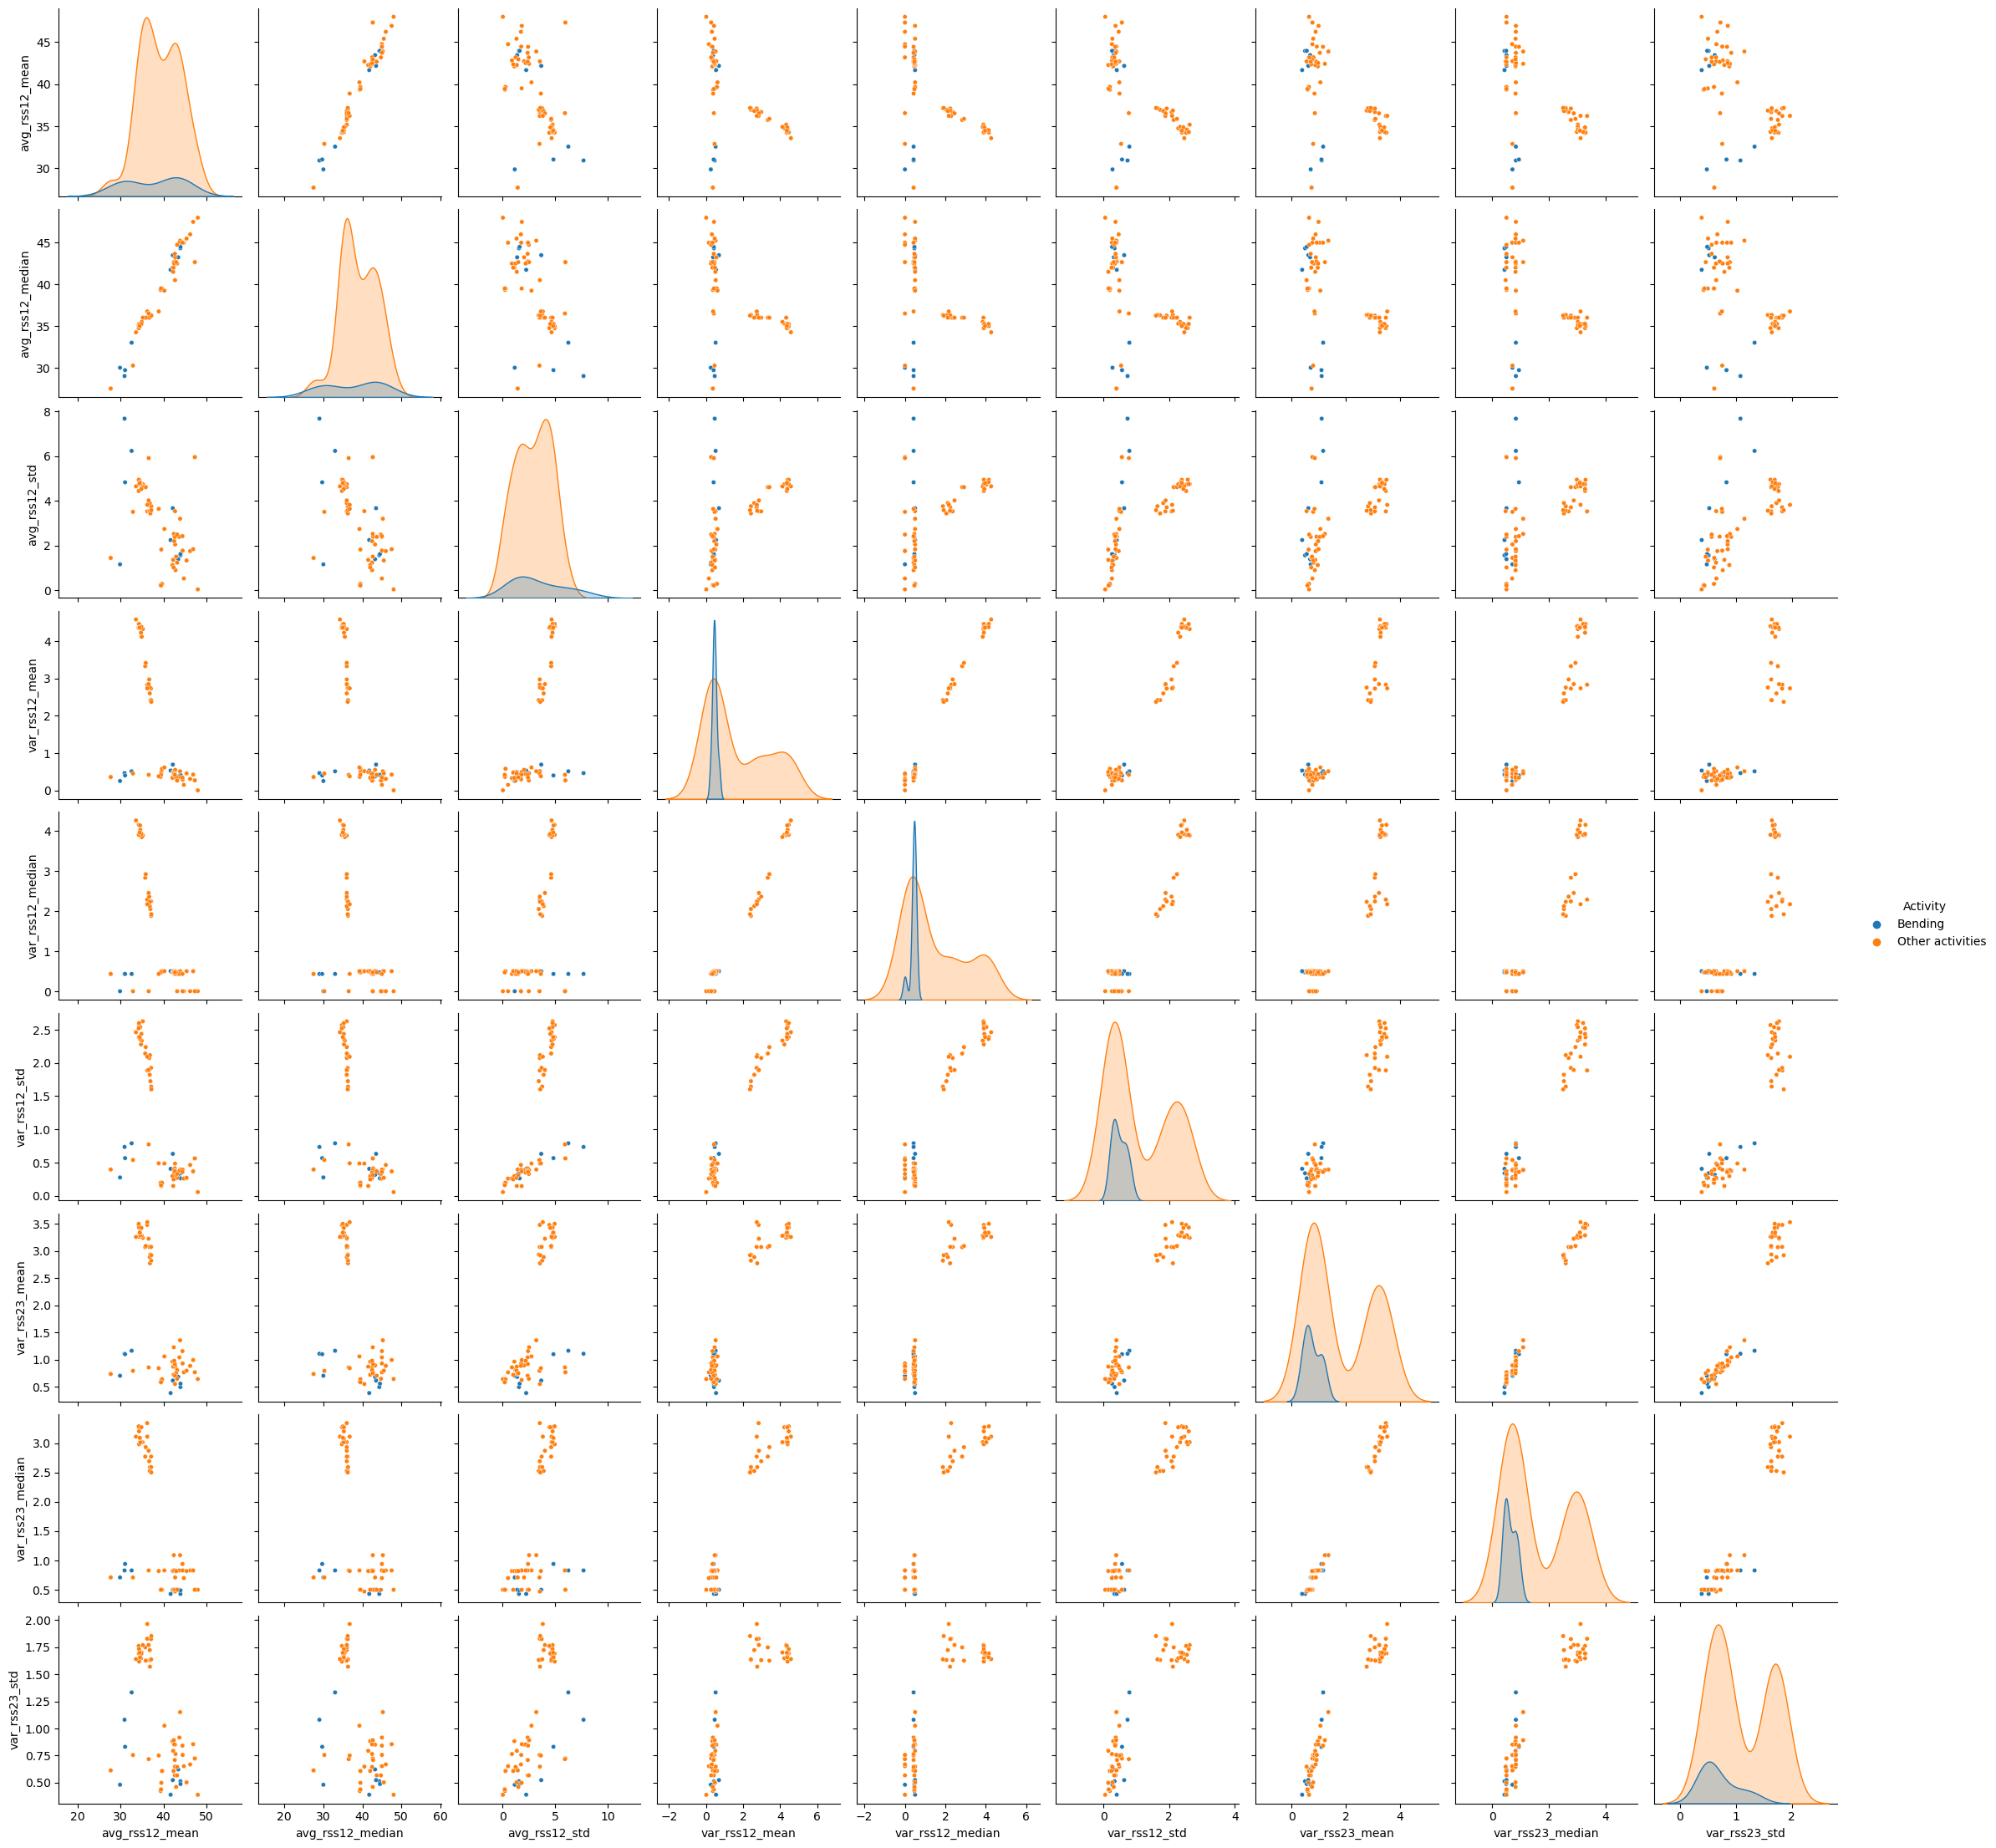

In [19]:
def extract_features_from_series(series):
    """Extracts mean, median, and std from a given series."""
    stats = series.describe()
    return stats['mean'], stats['50%'], stats['std']

def draw_scatter_plt(time_series, tr_set):
    # Initialize dictionaries to hold feature values
    feature_data = {}
    for feature in time_series:
        feature_data[f"{feature}_mean"] = []
        feature_data[f"{feature}_median"] = []
        feature_data[f"{feature}_std"] = []
    
    bending_act = []

    # Iterate over the training set to extract features
    for s in tr_set:
        for feature in time_series:
            mean, median, std = extract_features_from_series(s[feature])
            feature_data[f"{feature}_mean"].append(mean)
            feature_data[f"{feature}_median"].append(median)
            feature_data[f"{feature}_std"].append(std)
            
    # Assign the activity based on the length of one of the feature lists (e.g., mean of avg_rss12)
    num_bending = 9
    num_samples = len(feature_data[f"{time_series[0]}_mean"])
    bending_act = ['Bending' if i < num_bending else 'Other activities' for i in range(num_samples)]
    
    # Convert the data to a DataFrame and plot it
    feature_data['Activity'] = bending_act
    df = pd.DataFrame(feature_data)
    sns.pairplot(df, hue='Activity', plot_kws={'s':15})

time_series = ['avg_rss12', 'var_rss12', 'var_rss23'] #1,2,6
draw_scatter_plt(time_series, tr_set)

#### ii. Splitted Plots
Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

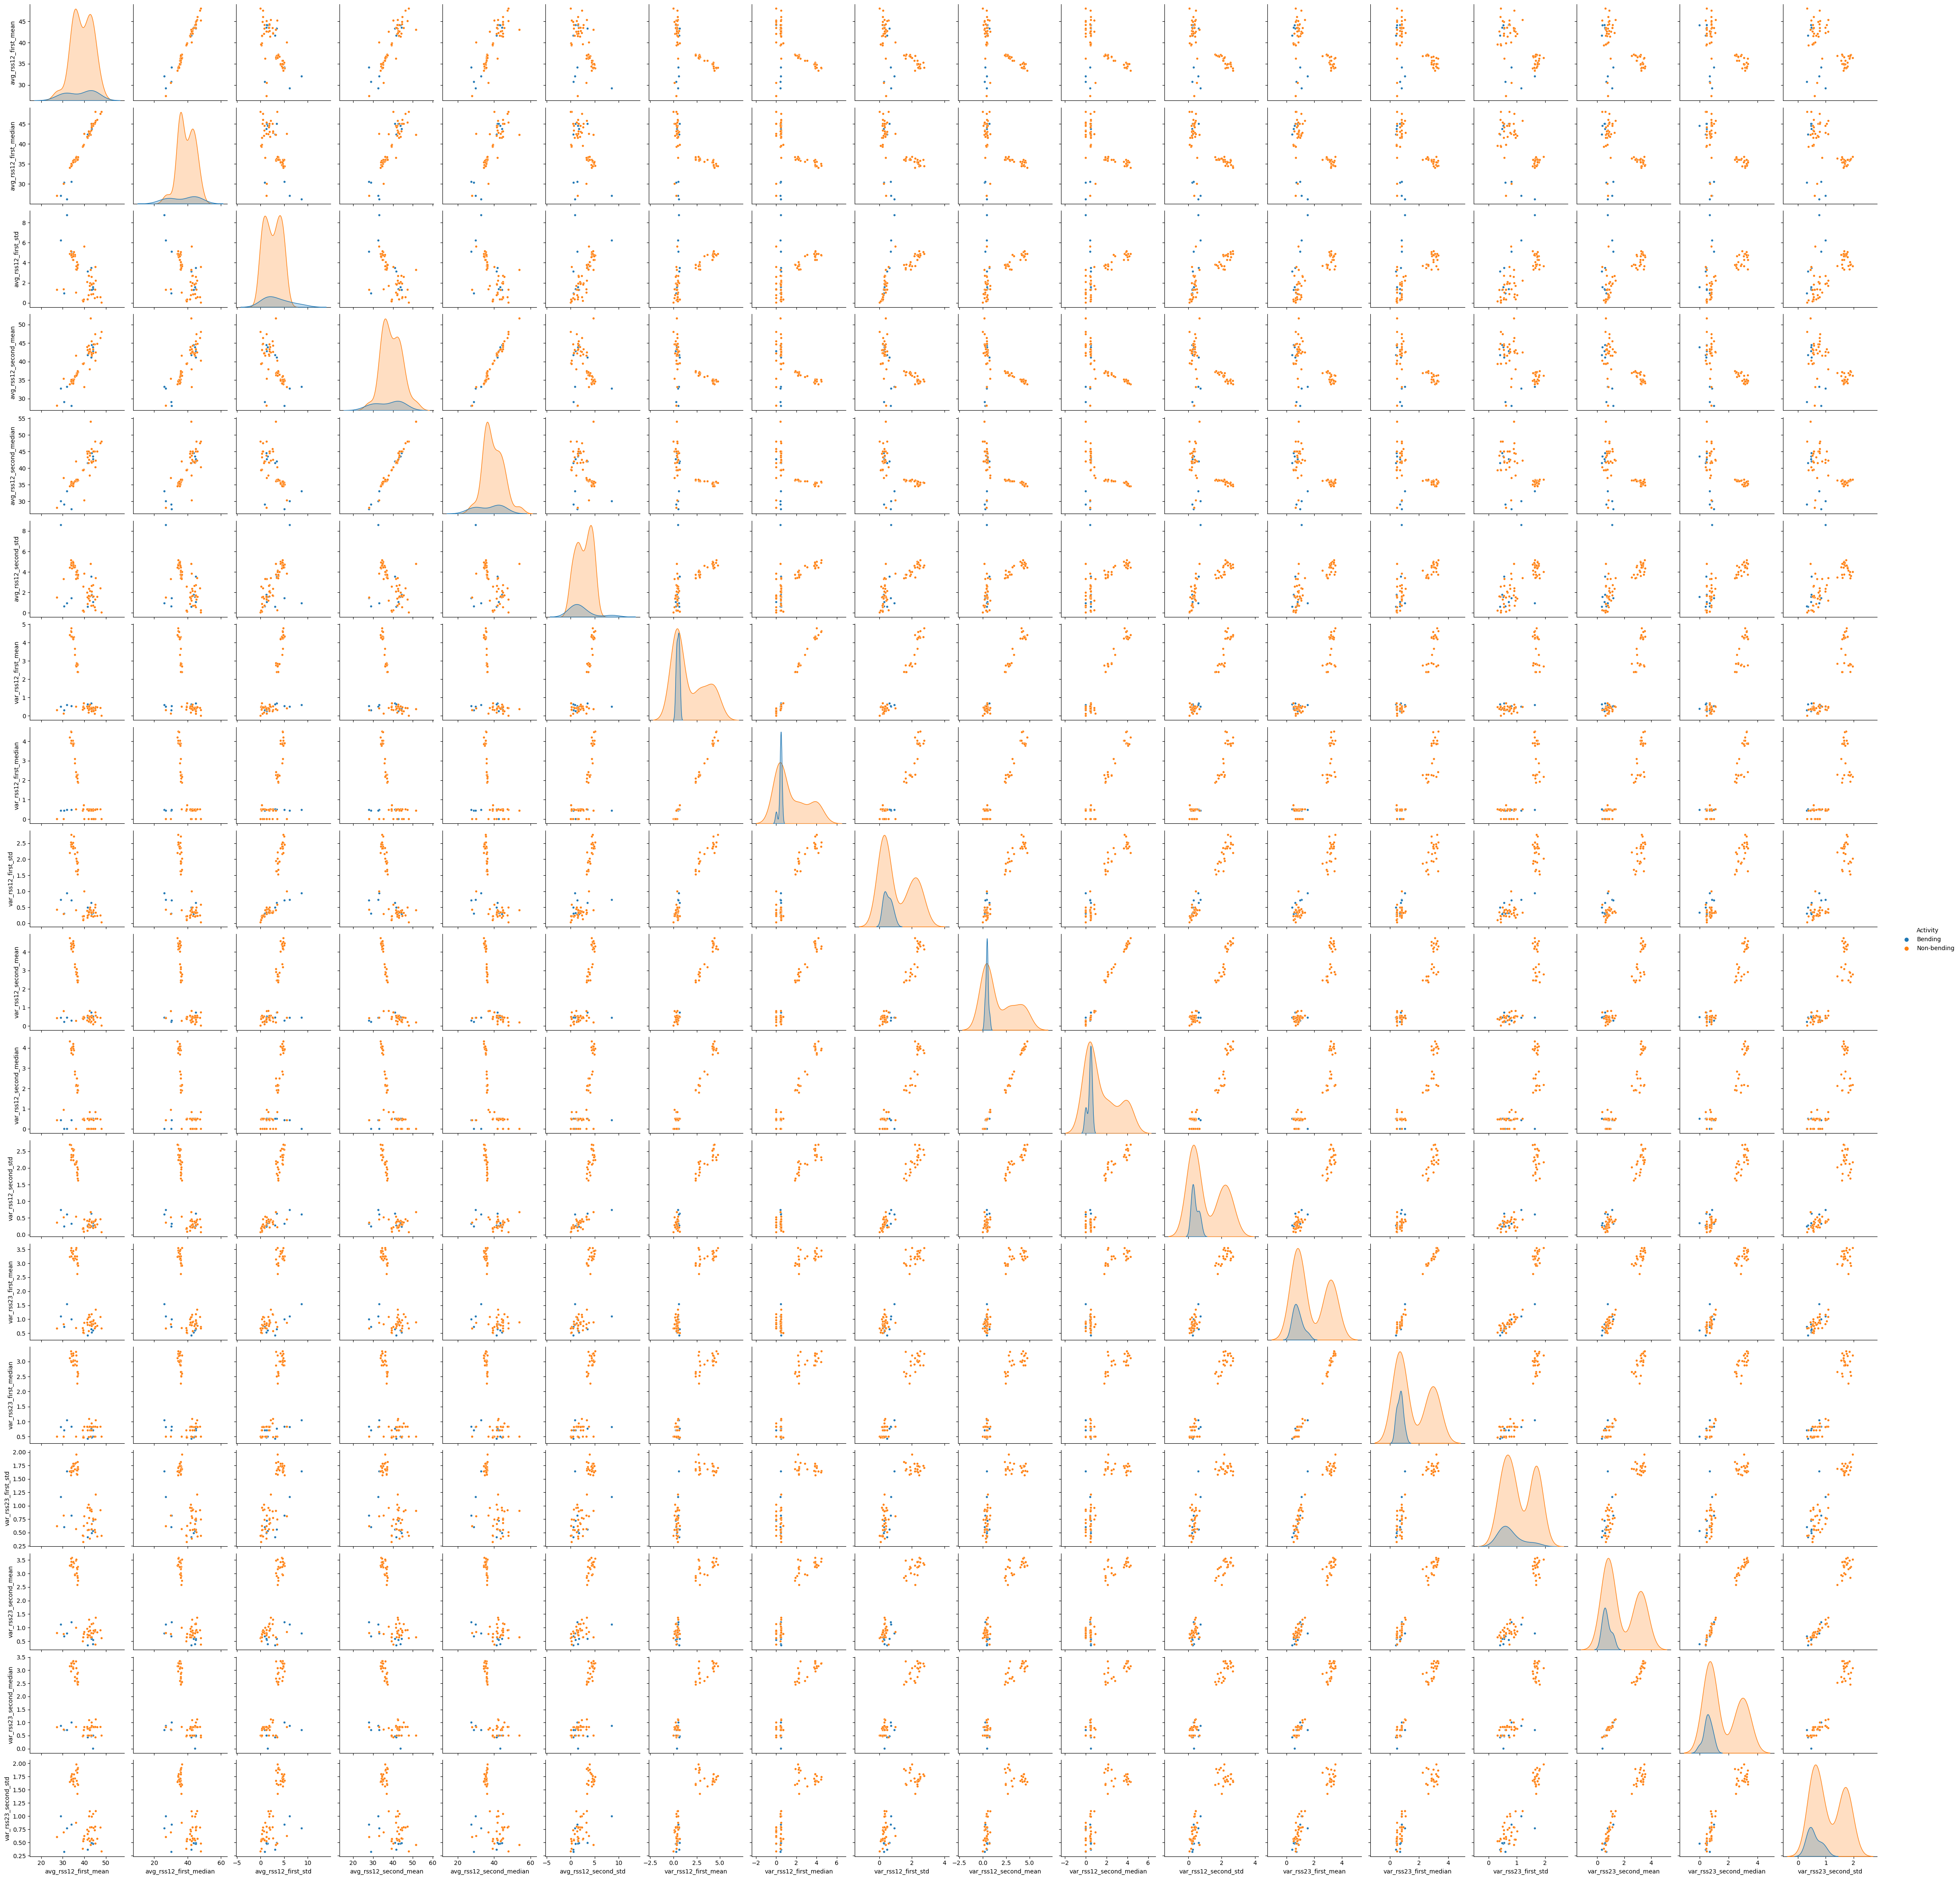

In [ ]:
def extract_features_from_split_series(series):
    """Extracts mean, median, and std from both parts of a split series."""
    mid_idx = len(series) // 2
    first_half = series[:mid_idx]
    second_half = series[mid_idx:]
    
    stats_first = first_half.describe()
    stats_second = second_half.describe()
    
    return {
        "first_mean": stats_first['mean'],
        "first_median": stats_first['50%'],
        "first_std": stats_first['std'],
        "second_mean": stats_second['mean'],
        "second_median": stats_second['50%'],
        "second_std": stats_second['std']
    }

def draw_scatter_plot_split_series(time_series, tr_set):
    # Initialize dictionaries to hold feature values
    feature_data = {}
    
    for feature in time_series:
        for prefix in ["first", "second"]:
            feature_data[f"{feature}_{prefix}_mean"] = []
            feature_data[f"{feature}_{prefix}_median"] = []
            feature_data[f"{feature}_{prefix}_std"] = []
    
    bending_act = []

    # Iterate over the training set to extract features from split series
    for s in tr_set:
        for feature in time_series:
            extracted = extract_features_from_split_series(s[feature])
            for key, value in extracted.items():
                feature_data[f"{feature}_{key}"].append(value)
            
    # Assign the activity based on the length of one of the feature lists (e.g., mean of avg_rss12)
    num_bending = 9
    num_samples = len(feature_data[f"{time_series[0]}_first_mean"])
    bending_act = ['Bending' if i < num_bending else 'Non-bending' for i in range(num_samples)]
    
    # Convert the data to a DataFrame and plot it
    feature_data['Activity'] = bending_act
    df = pd.DataFrame(feature_data)
    sns.pairplot(df, hue='Activity', plot_kws={'s':15})

time_series = ['avg_rss12', 'var_rss12', 'var_rss23']
draw_scatter_plot_split_series(time_series, tr_set)

### Visually I do not see much differences betweeen base model versus ploting with the model splited first half and second half in terms of showing different patterns or clearer clusters than the original.

#### iii. Time Series Segments

In [20]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def segment_time_series(df, l):
    segment_size = len(df) // l
    aggregated_features = []
    for i in range(l):
        segment = df.iloc[i*segment_size : (i+1)*segment_size, :]
        stats = [segment[col].describe() for col in segment.columns]
        features = [item for stat in stats for item in [stat['mean'], stat['50%'], stat['std']]]
        aggregated_features.extend(features)
    return aggregated_features

def extract_targets_and_features(dataset, bending_threshold=9):
    labels = [1 if i < bending_threshold else 0 for i in range(len(dataset))]
    features_data = [segment_time_series(df, l) for df in dataset]
    return features_data, labels

# Main code execution
if __name__ == "__main__":
    for l in range(1, 21):
        # Data extraction and feature creation
        features_data, target_labels = extract_targets_and_features(tr_set, l)
        features_df = pd.DataFrame(features_data)
        
        # Feature scaling
        scaler = StandardScaler()
        scaled_features_df = pd.DataFrame(scaler.fit_transform(features_df), columns=features_df.columns)

        # Add constant column for statsmodels logistic regression
        X_with_const = sm.add_constant(scaled_features_df)

        # Fit logistic regression and handle potential singular matrix issues
        try:
            model = sm.Logit(target_labels, X_with_const).fit(disp=0)
            significant_feature_names = model.pvalues[model.pvalues < 0.05].index.to_list()
            significant_feature_names = [feature for feature in significant_feature_names if feature != "const"]

            if not significant_feature_names:
                print(f"For L = {l}: No significant features found.")
                print('-----------------------------')
                continue

            # Print results
            print(f'For L = {l}:')
            print(f'Significant features based on p-values: {significant_feature_names}')
            print('-----------------------------')
        except np.linalg.LinAlgError:
            print(f"For L = {l}: Singular Matrix Error.")
            print('-----------------------------')

For L = 1: No significant features found.
-----------------------------
For L = 2: Singular Matrix Error.
-----------------------------
For L = 3: Singular Matrix Error.
-----------------------------
For L = 4: Singular Matrix Error.
-----------------------------
For L = 5: Singular Matrix Error.
-----------------------------
For L = 6: Singular Matrix Error.
-----------------------------
For L = 7: Singular Matrix Error.
-----------------------------
For L = 8: Singular Matrix Error.
-----------------------------
For L = 9: Singular Matrix Error.
-----------------------------
For L = 10: Singular Matrix Error.
-----------------------------
For L = 11: Singular Matrix Error.
-----------------------------
For L = 12: Singular Matrix Error.
-----------------------------
For L = 13: Singular Matrix Error.
-----------------------------
For L = 14: Singular Matrix Error.
-----------------------------
For L = 15: Singular Matrix Error.
-----------------------------
For L = 16: Singular Matri

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

def segment_time_series(df, l):
    """Segment a single DataFrame into l segments and aggregate features for each segment."""
    segment_size = len(df) // l
    aggregated_features = []
    for i in range(l):
        segment = df.iloc[i*segment_size : (i+1)*segment_size, :]
        stats = [segment[col].describe() for col in segment.columns]
        features = [item for stat in stats for item in [stat['mean'], stat['50%'], stat['std']]]
        aggregated_features.extend(features)
    return aggregated_features

def extract_targets_and_features(dataset, bending_threshold=9):
    """Get target labels and corresponding feature data from the segmented dataset."""
    labels = [1 if i < bending_threshold else 0 for i in range(len(dataset))]
    features_data = [segment_time_series(df, l) for df in dataset]
    return features_data, labels

# Main code execution for RFE
if __name__ == "__main__":
    for l in range(1, 21):
        # Data preparation
        features_data, target_labels = extract_targets_and_features(tr_set, l)
        features_df = pd.DataFrame(features_data)
        
        # Feature scaling
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features_df)

        # Model training and feature selection
        model = LogisticRegression()
        
        # Use StratifiedKFold for cross-validation
        cv = StratifiedKFold(n_splits=5)
        
        rfe = RFECV(model, step=1, cv=cv, scoring='accuracy')
        
        try:
            rfe.fit(scaled_features, target_labels)
            
            # Print results
            print(f'For L = {l}:')
            print(f'Optimal feature quantity: {rfe.n_features_}')
            print(f'Best features: {features_df.columns[rfe.support_]}')
            print('-----------------------------')
        except ValueError as e:
            print(f"Error for L = {l}: {str(e)}")
            print('-----------------------------')


Error for L = 1: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
-----------------------------
For L = 2:
Optimal number of features: 6
Best features: Int64Index([10, 11, 15, 16, 36, 37], dtype='int64')
-----------------------------
For L = 3:
Optimal number of features: 1
Best features: Int64Index([36], dtype='int64')
-----------------------------
For L = 4:
Optimal number of features: 3
Best features: Int64Index([15, 58, 79], dtype='int64')
-----------------------------
For L = 5:
Optimal number of features: 8
Best features: Int64Index([3, 15, 16, 36, 37, 80, 99, 100], dtype='int64')
-----------------------------
For L = 6:
Optimal number of features: 8
Best features: Int64Index([15, 16, 36, 37, 46, 78, 120, 125], dtype='int64')
-----------------------------
For L = 7:
Optimal number of features: 3
Best features: Int64Index([15, 36, 146], dtype='int64')
-----------------------------
For L = 8:
Optimal number of features: 3
Best fea

#### Explain what the right way and the wrong way are to perform cross-validation in this problem.
#### : Using RFECV method to perform cross-validation is the right way and only possibe in this case. The p-value method wasn't able to correctly find the solutions maybe due to multicollinearity or over-specified models. It might have some situations like more predictors than observations.

#### iv. Confusion Matrix

#### v. Test Classifier

#### vi. Separation

#### vii. Imbalance

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

#### ii. Comparison

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

#### ii. Naive Bayes

#### ii. Comparison

## 3. ISLR 4.8.3

## 4. ISLR 4.8.7

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9